As a data scientist, there are a number of steps to follow in order to make sense of a provided dataset. These steps help build a reliable and strong model and provide accurate predictions. 
We will start by loading and inspecting the dataset.
1. Load and inspect the data

In [44]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 2.4 MB/s eta 0:00:52
   ---------------------------------------- 1.3/124.9 MB 2.5 MB/s eta 0:00:50
    --------------------------------------- 2.4/124.9 MB 3.2 MB/s eta 0:00:39
    --------------------------------------- 2.6/124.9 MB 3.1 MB/s eta 0:00:39
   - -------------------------------------- 3.4/124.9 MB 2.9 MB/s eta 0:00:42
   - -------------------------------------- 3.9/124.9 MB 3.0 MB/s eta 0:00:41
   - -------------------------------------- 4.2/124.9 MB 2.8 MB/s eta 0:00:44
   - -------------------------------------- 5.2/124.9 MB 2.9 MB/s eta 0:00:42
   -- ------------------------------------- 6.3/124.9 MB 3.1 MB/s eta 0:00:38
   -- ------------------------------------- 7.6/124.9 MB 3.4 MB/s eta 0:00:35
   -- ------------------------------------- 8.4/124.9 MB 3.5 MB/s eta 0:00:34


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


file_path = "housing.csv"
df = pd.read_csv(file_path)

Let's display basic information about the dataset to better understand what we are dealing with.

In [22]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


(None,
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                  41          880           129.0   
 1    -122.22     37.86                  21         7099          1106.0   
 2    -122.24     37.85                  52         1467           190.0   
 3    -122.25     37.85                  52         1274           235.0   
 4    -122.25     37.85                  52         1627           280.0   
 
    population  households  median_income ocean_proximity  median_house_value  
 0         322         126         8.3252        NEAR BAY              452600  
 1        2401        1138         8.3014        NEAR BAY              358500  
 2         496         177         7.2574        NEAR BAY              352100  
 3         558         219         5.6431        NEAR BAY              341300  
 4         565         259         3.8462        NEAR BAY              342200  )

In [23]:
num_rows, num_columns = df.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 20640 rows and 10 columns.


In [24]:
# Handling Missing Values
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

2. Next step involves an exploratory data analysis (EDA) to investigate and analyze the dataset and summarize the main characteristics. 

In [25]:
summary = df.describe()

print(summary)

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [26]:
# Correlation Matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

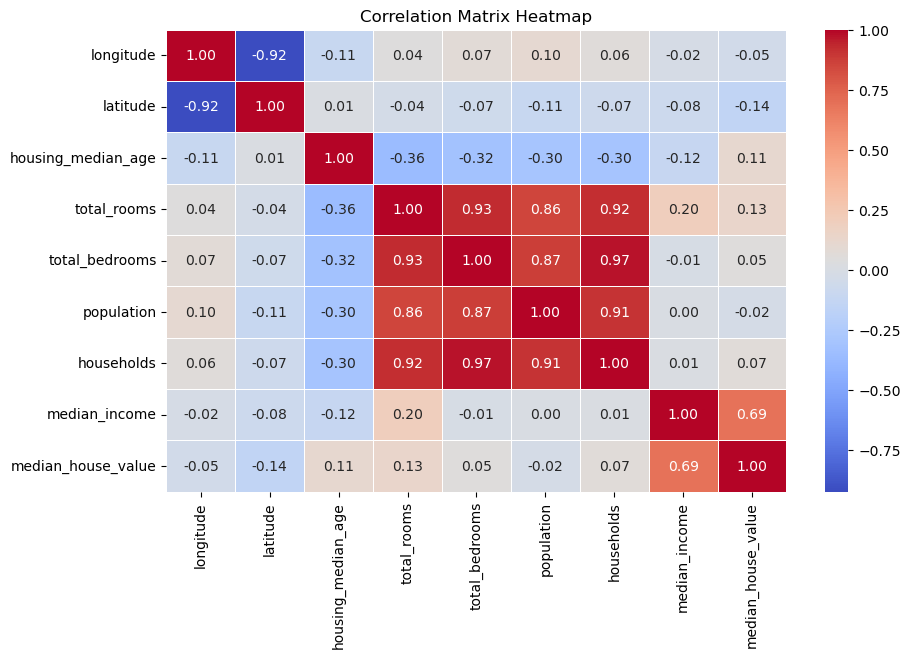

In [28]:
# Visualizing correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

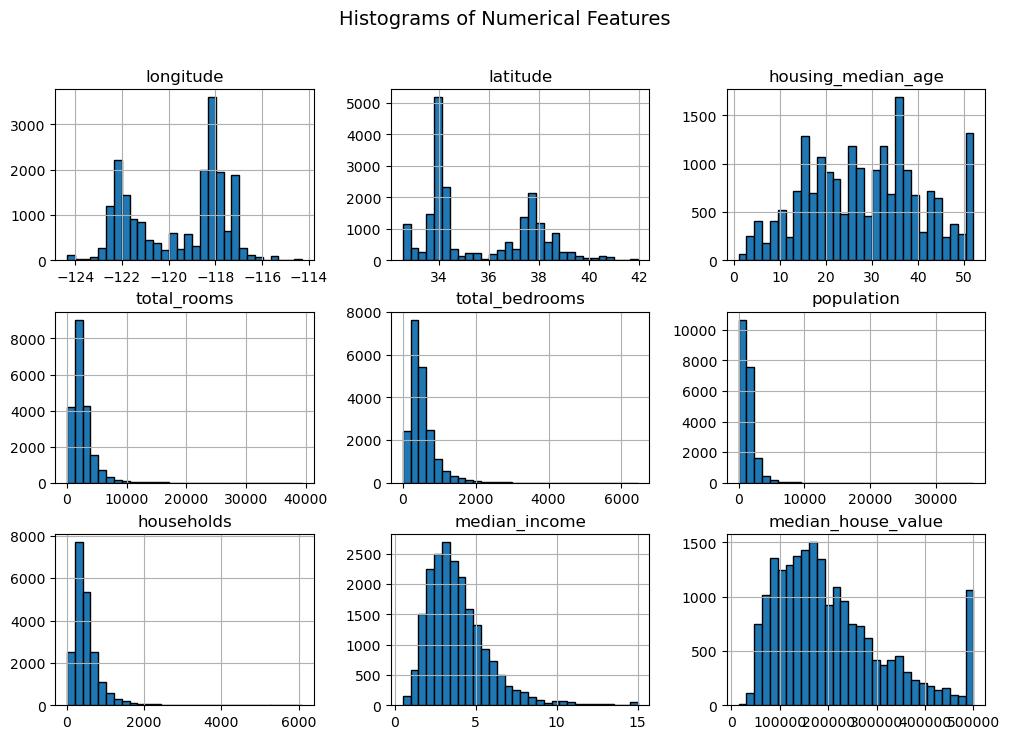

In [29]:
# Histograms of numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

The dataset contains 20.640 rows and 10 columns. total_bedrooms had missing values, which were filled with the median. From the above, correlation heatmap shows that median_income has the highest correlation with house value. Moreover, total_rooms and households also show a moderate correlation. 

3. Feature Engieering
We will create new features in the dataset. This helps transforming raw data into meaningful features (input variables) that can be used by a machine learning model. 

In [30]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

4. Splitting data for training and testing

In [31]:
X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [33]:
X = pd.get_dummies(X, columns=["ocean_proximity"], drop_first=True)

In [34]:
# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Standardizing the features

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6. Training a regression model
We will now proceed by training a regression model

In [36]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

7. Predictions & Evaluation

In [37]:
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [39]:
# Summary statistics
print(f"This is the summary", summary)
print(f"This is the rmse", rmse) 
print(f"This is the r2", r2) 

This is the summary           longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   


Let's train other models 

In [71]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, objective="reg:squarederror")
}

In [47]:
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}

In [48]:
# We need to convert results to a DataFrame for better readability
results_df = pd.DataFrame(results).T

In [56]:
# Identify the best model based on RMSE and R² score
best_model = results_df.sort_values(by="RMSE").iloc[0]
best_model_name = results_df.sort_values(by="RMSE").index[0]

best_model_name, best_model

('XGBoost',
 RMSE    47316.352718
 R²          0.829150
 Name: XGBoost, dtype: float64)

The best model for predicting house prices in this dataset is XGBoost

Now, let's have a look at the random forest algorithm

In [62]:
# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Compute performance metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [63]:
# Display results
print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse_rf}")
print(f"R² Score: {r2_rf}")

Random Forest Model Performance:
RMSE: 50330.947163568584
R² Score: 0.8066859824340856


From the responses above, the random forest model performs significantly better than Linear Regression and XGBoost in this case. 

After Random Forest, another effective regression method is Gradient Boosting Regression (GBR). Gradient Boosting is an ensemble learning method that builds trees sequentially, where each tree corrects the errors of the previous one.

I'll train a Gradient Boosting Regressor (GBR), evaluate its performance, and compare it to Random Forest.

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Compute performance metrics
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

In [65]:
print(f"Gradient Boosting Model Performance:")
print(f"RMSE: {rmse_gbr}")
print(f"R² Score: {r2_gbr}")

Gradient Boosting Model Performance:
RMSE: 53616.34930233922
R² Score: 0.7806247545427015


The Random Forest model performed slightly better than Gradient Boosting in this case, but GBR is still a strong model.

In [70]:
# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Compute performance metrics
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display results
print(f"Ridge Regression Model Performance:")
print(f"RMSE: {rmse_ridge}")
print(f"R² Score: {r2_ridge}")

Ridge Regression Model Performance:
RMSE: 72666.3482212373
R² Score: 0.5970419730412293


Linear Regression Model

In [72]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Compute performance metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Display results
print(f"Linear Regression Model Performance:")
print(f"RMSE: {rmse_lr}")
print(f"R² Score: {r2_lr}")

Linear Regression Model Performance:
RMSE: 72668.53837868226
R² Score: 0.5970176824350761


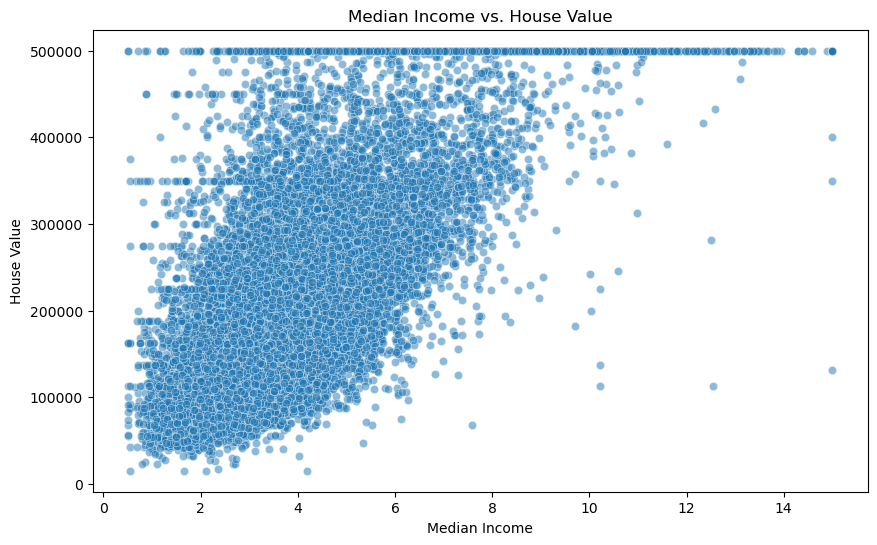

In [73]:
# Scatter plot of median income vs. house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], alpha=0.5)
plt.title("Median Income vs. House Value")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.show()

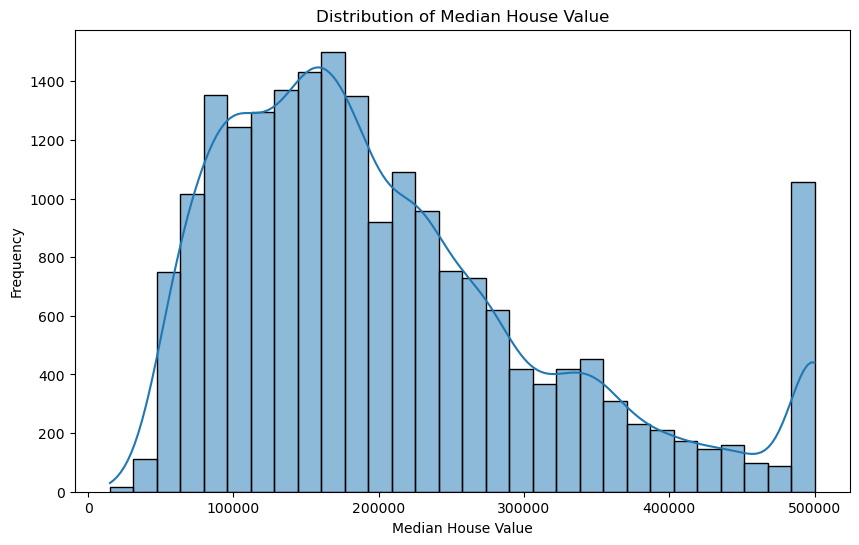

In [74]:
# Plot distribution of median house value
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=30, kde=True, edgecolor="black")
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


In [77]:
# Handle missing values
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Define features and target variable
X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

# Identify categorical and numerical features
categorical_features = ["ocean_proximity"]
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Create preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Splitting dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, objective="reg:squarederror")
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results).T

# Display results
print(results_df)

                           RMSE        R²
Linear Regression  70060.521845  0.625424
Ridge Regression   70067.346500  0.625351
Random Forest      48941.954703  0.817209
Gradient Boosting  55881.776074  0.761695
XGBoost            56009.207664  0.760607
